In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [37]:
#Load datasets
train_data = pd.read_csv("ml_case_training_data.csv")
churn_data = pd.read_csv("ml_case_training_output.csv")
train_hist = pd.read_csv("ml_case_training_hist_data.csv")
test_data = pd.read_csv("ml_case_test_data.csv")
test_hist = pd.read_csv("ml_case_test_hist_data.csv")

churn_data.rename(columns={"churn": "target"}, inplace=True)

# Merge datasets using 'id' as the key
merged_data = pd.merge(train_data, churn_data, on="id")

# Drop unnecessary columns
merged_data.drop(columns=["id"], inplace=True)

# Display dataset info
print(merged_data.info())

# Check the first few rows
merged_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   activity_new              6551 non-null   object 
 1   campaign_disc_ele         0 non-null      float64
 2   channel_sales             11878 non-null  object 
 3   cons_12m                  16096 non-null  int64  
 4   cons_gas_12m              16096 non-null  int64  
 5   cons_last_month           16096 non-null  int64  
 6   date_activ                16096 non-null  object 
 7   date_end                  16094 non-null  object 
 8   date_first_activ          3508 non-null   object 
 9   date_modif_prod           15939 non-null  object 
 10  date_renewal              16056 non-null  object 
 11  forecast_base_bill_ele    3508 non-null   float64
 12  forecast_base_bill_year   3508 non-null   float64
 13  forecast_bill_12m         3508 non-null   float64
 14  foreca

,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,target
0,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,...,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,...,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


In [38]:
# Fill missing values with median for numerical columns
merged_data.fillna(merged_data.median(numeric_only=True), inplace=True)

# Convert categorical variables to numeric using one-hot encoding
merged_data = pd.get_dummies(merged_data)

# Verify dataset shape
print(f"Dataset shape after preprocessing: {merged_data.shape}")


Dataset shape after preprocessing: (16096, 6626)


In [39]:
# Define target variable
y = merged_data["target"]
X = merged_data.drop(columns=["target"])  # Drop the target column from features

# Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}")




Training set: (12876, 6625), Validation set: (3220, 6625)


In [40]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_val)


Model Accuracy: 0.9016
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      2890
           1       0.81      0.05      0.10       330

    accuracy                           0.90      3220
   macro avg       0.86      0.53      0.52      3220
weighted avg       0.89      0.90      0.86      3220



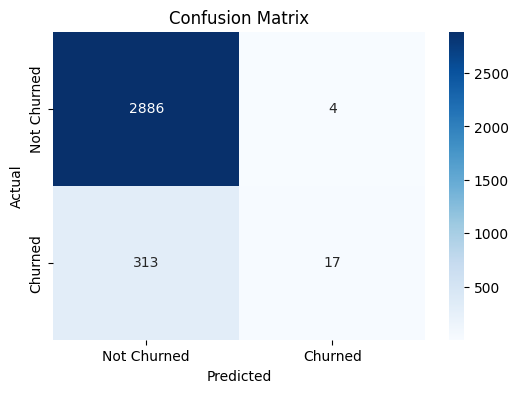

In [41]:
# Evaluate model accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Generate classification report
print("Classification Report:\n", classification_report(y_val, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Not Churned", "Churned"], yticklabels=["Not Churned", "Churned"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
